## Deep learning model to predict cement strength using Keras

Author: Keshab R Sapkota

## Abstract

In this project, I build a deep learning model using Keras to predict cement strength from concrete data. The data is available in https://cocl.us/concrete_data. The model consists of 3 hidden layer of artificial neural network with 10 nodes. The concrete data is splitted randomly into train set (70%) and test set  (30%). The data is normalized and used to train the model using 300 epochs. The test set was used to test the pediction performance and root mean square error is calculated as a performance metrics. The model performs resonaby well to predict cement strength with low root mean square error.

## 1. Importing data and preprocessing

#### a. Import data and look up

In [1]:
#import pandas and numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Import data
df = pd.read_csv('https://cocl.us/concrete_data')

In [3]:
#Check first few rows of the data
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
#Check data shape
df.shape

(1030, 9)

In [5]:
#Check if there is any missing values
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

#### b. Split data into predictor and target

In [6]:
# Get predictor columns and the number of columns
X_col = df.columns[df.columns != 'Strength']
n = X_col.shape[0]
print(n)
X_col

8


Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age'],
      dtype='object')

In [7]:
#Split data into predictor and target
X = df[X_col]
y = df['Strength']

#### c. Data visualization

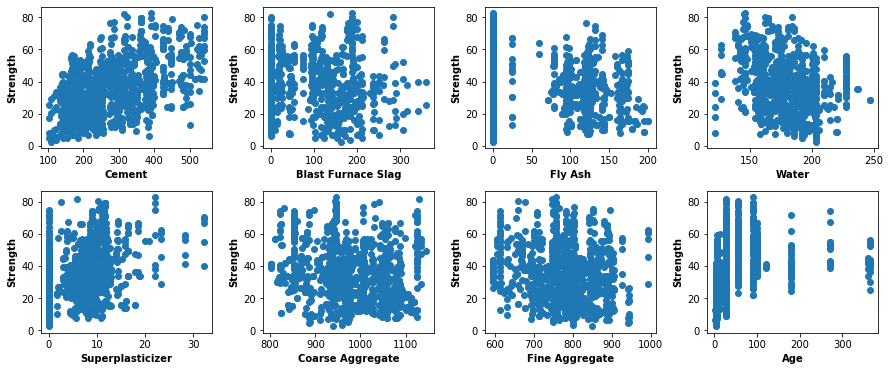

In [8]:
#Plot each column of predictor vs target using pyplot

fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize = (15, 6))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
for i in range(8):
    ax = eval('ax%s'%(i+1))
    ax.scatter(X[X_col[i]],y)
    ax.set_xlabel(X_col[i], fontweight = 'bold')
    ax.set_ylabel('Strength', fontweight = 'bold')

#### e. Split data into train-test set: 
Random split of data into training and testing sets with 30% of data holding for test

In [9]:
# Train test split using sklearn
from sklearn.model_selection import train_test_split
X_train_, X_test_, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)
print('X_train_:', X_train_.shape, ', X_test_:', X_test_.shape, ', y_train:', y_train.shape, ', y_test:', y_test.shape)

X_train_: (721, 8) , X_test_: (309, 8) , y_train: (721,) , y_test: (309,)


#### d. Normalize data

In [10]:
X_train = (X_train_ - X_train_.mean())/X_train_.std()
X_train.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
426,-1.011776,0.241069,1.628571,-0.410464,0.548782,0.445802,-0.341402,-0.497319
835,-1.291575,-0.863174,1.862461,-1.064480,1.895817,-0.367854,0.864272,-0.269606
242,-0.486920,-0.863174,0.982663,0.636876,-0.035475,0.710684,-0.205237,0.185821
823,0.379704,-0.863174,-0.848183,0.993612,-1.025465,0.025033,0.319615,2.202711
157,0.760906,1.371322,-0.848183,-0.748906,0.857139,-0.346309,-0.227519,0.185821


In [11]:
X_test = (X_test_ - X_test_.mean())/X_test_.std()
X_test.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
559,-0.407155,3.141591,-0.842393,0.171394,-1.077605,-0.444879,-1.368200,-0.301542
705,-1.578924,1.196361,-0.842393,1.055643,-1.077605,-0.223806,0.354074,-0.674785
500,2.110646,-0.553791,1.117885,0.931451,-0.369948,-2.037670,-0.928120,-0.301542
218,-0.900900,-0.841973,1.152947,-1.010918,0.718756,1.506157,0.385780,0.773399
836,0.237819,0.709777,-0.842393,1.577251,0.011098,-1.065481,-0.636424,-0.301542


## 2. Build a deep learning model

#### a. Import libraries

In [12]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


#### b. Define regression function with 3 hidden layers:
Let's define regression function using three hidden layer with 10 nodes, reLu activation function, adam optimizer, and mean squared error as  a loss function.

In [13]:
#Model with one hidden layer and 10 nodes
from keras import backend
from keras import losses

def rmse(y_true, y_pred):
    error = backend.sqrt(losses.mean_squared_error(y_true, y_pred))
    return(error)

def linReg():
    model = Sequential()
    model.add(Dense(10, activation = 'relu', input_shape =(n,)))
    model.add(Dense(10, activation = 'relu'))
    model.add(Dense(10, activation = 'relu'))
    model.add(Dense(1))
    model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = [rmse])
    return (model)

#### c. Train the model using train data set and save it

In [14]:
#Fitting (training) the model using 300 epochs
model = linReg()
history = model.fit(X_train, y_train, epochs = 300,verbose = 2)

Epoch 1/300
 - 0s - loss: 1561.1950 - rmse: 35.7739
Epoch 2/300
 - 0s - loss: 1538.4387 - rmse: 35.4648
Epoch 3/300
 - 0s - loss: 1508.9982 - rmse: 35.0730
Epoch 4/300
 - 0s - loss: 1459.0336 - rmse: 34.4082
Epoch 5/300
 - 0s - loss: 1375.8888 - rmse: 33.2857
Epoch 6/300
 - 0s - loss: 1251.5100 - rmse: 31.4860
Epoch 7/300
 - 0s - loss: 1072.8872 - rmse: 28.7673
Epoch 8/300
 - 0s - loss: 846.2888 - rmse: 24.8779
Epoch 9/300
 - 0s - loss: 604.6437 - rmse: 20.3913
Epoch 10/300
 - 0s - loss: 406.5527 - rmse: 16.4617
Epoch 11/300
 - 0s - loss: 297.6958 - rmse: 14.0779
Epoch 12/300
 - 0s - loss: 254.8349 - rmse: 12.9199
Epoch 13/300
 - 0s - loss: 233.3378 - rmse: 12.3804
Epoch 14/300
 - 0s - loss: 218.4354 - rmse: 12.0306
Epoch 15/300
 - 0s - loss: 208.2264 - rmse: 11.7404
Epoch 16/300
 - 0s - loss: 200.1409 - rmse: 11.5421
Epoch 17/300
 - 0s - loss: 193.6162 - rmse: 11.3767
Epoch 18/300
 - 0s - loss: 187.8400 - rmse: 11.2248
Epoch 19/300
 - 0s - loss: 182.5760 - rmse: 11.0750
Epoch 20/300
 

Epoch 161/300
 - 0s - loss: 61.0637 - rmse: 6.1377
Epoch 162/300
 - 0s - loss: 59.8371 - rmse: 6.0619
Epoch 163/300
 - 0s - loss: 59.4703 - rmse: 6.0367
Epoch 164/300
 - 0s - loss: 58.8286 - rmse: 6.0261
Epoch 165/300
 - 0s - loss: 58.2415 - rmse: 5.9637
Epoch 166/300
 - 0s - loss: 57.2445 - rmse: 5.9221
Epoch 167/300
 - 0s - loss: 56.8065 - rmse: 5.9115
Epoch 168/300
 - 0s - loss: 55.9356 - rmse: 5.8478
Epoch 169/300
 - 0s - loss: 55.6330 - rmse: 5.8299
Epoch 170/300
 - 0s - loss: 54.4941 - rmse: 5.7737
Epoch 171/300
 - 0s - loss: 54.4713 - rmse: 5.7623
Epoch 172/300
 - 0s - loss: 53.4955 - rmse: 5.7103
Epoch 173/300
 - 0s - loss: 53.8903 - rmse: 5.7658
Epoch 174/300
 - 0s - loss: 52.7386 - rmse: 5.6628
Epoch 175/300
 - 0s - loss: 51.8648 - rmse: 5.6154
Epoch 176/300
 - 0s - loss: 51.7010 - rmse: 5.5914
Epoch 177/300
 - 0s - loss: 51.3089 - rmse: 5.5688
Epoch 178/300
 - 0s - loss: 51.0528 - rmse: 5.5389
Epoch 179/300
 - 0s - loss: 50.7247 - rmse: 5.5185
Epoch 180/300
 - 0s - loss: 49.

Text(0, 0.5, 'RMSE')

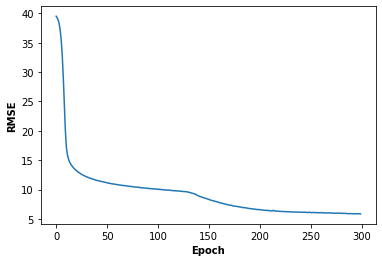

In [15]:
plt.plot(np.sqrt(history.history['loss']))
plt.xlabel('Epoch', fontweight = 'bold')
plt.ylabel('RMSE', fontweight = 'bold')

#### d. Use trained model for prediction


In [16]:
#Following code can be used to save and import the model

'''
#Save the model and load it to predict
model.save('regression_model.h5')

#Get the path where the .h5 file is saved
import os
path = os.getcwd() + '\\regression_model.h5'

#Load model and predict on the test data
from keras.models import load_model 
trained_model = load_model(path)
y_pred = trained_model.predict(X_test)
'''

"\n#Save the model and load it to predict\nmodel.save('regression_model.h5')\n\n#Get the path where the .h5 file is saved\nimport os\npath = os.getcwd() + '\\regression_model.h5'\n\n#Load model and predict on the test data\nfrom keras.models import load_model \ntrained_model = load_model(path)\ny_pred = trained_model.predict(X_test)\n"

In [17]:
#Predict using trained model
y_pred = model.predict(X_test)

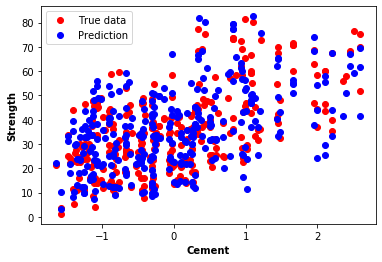

In [18]:
#Plot cement versus strength

plt.plot(X_test.to_numpy()[:, 0], y_pred, 'ro', label = 'True data')
plt.plot(X_test.to_numpy()[:, 0], y_test.to_numpy(), 'bo', label = 'Prediction')
plt.xlabel('Cement', fontweight = 'bold')
plt.ylabel('Strength', fontweight = 'bold')
plt.legend()

The plot above shows the true and predicted data distribution. Now, let's calculate root mean squred error. 

In [19]:
#Mean squared error
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

7.052413040970215